In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/dosya/Projects/lab_iis/jupyter/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/dosya/Projects/lab_iis/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/dosya/Projects/lab_iis/jupyter/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
 

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

random_state=17

from scipy.stats import skew

In [3]:
# df = pd.read_excel("AirQualityUCI.xlsx")
df = pd.read_csv("train (2).csv")

In [4]:
df.head()

,Datetime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,150,11.881723,166,1056.25,113,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,112,9.397165,103,1173.75,92,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,88,8.997817,131,1140.00,114,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,80,9.228796,172,1092.00,122,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,51,6.518224,131,1205.00,116,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),6218.0,-44.910888,85.426570,-200.000000,0.300000,1.400000,2.500000,11.900000
PT08.S1(CO),6218.0,1097.619197,219.648345,647.250000,934.312500,1061.500000,1229.187500,2039.750000
NMHC(GT),6218.0,-140.285462,165.886754,-200.000000,-200.000000,-200.000000,-200.000000,1189.000000
C6H6(GT),6218.0,10.752109,7.624613,0.212798,5.062370,8.953194,14.579057,63.741476
NOx(GT),6218.0,106.154390,232.436783,-200.000000,25.000000,100.500000,202.750000,1389.000000
PT08.S3(NOx),6218.0,853.354066,247.810278,322.000000,683.312500,823.250000,987.250000,2121.250000
NO2(GT),6218.0,31.334513,130.417719,-200.000000,33.000000,81.000000,115.000000,288.000000
PT08.S4(NO2),6218.0,1587.471574,290.086998,697.000000,1393.562500,1563.500000,1751.187500,2775.000000
PT08.S5(O3),6218.0,1005.298408,377.588143,261.000000,732.312500,944.625000,1237.000000,2522.250000
T,6218.0,21.898364,7.656470,1.300000,16.250000,21.375000,26.725000,44.600000


In [6]:
ProfileReport(df.drop("C6H6(GT)", axis=1))

Number of variables,12
Number of observations,6218
Total Missing (%),0.0%
Total size in memory,583.0 KiB
Average record size in memory,96.0 B
Numeric,11
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


Text(0.5,1,'Correlation matrix')

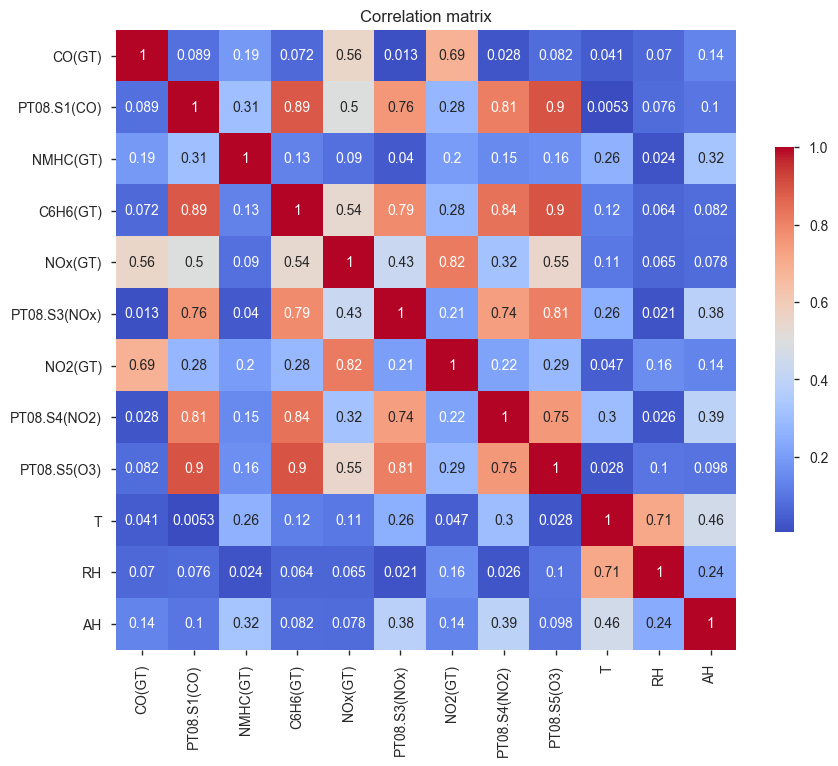

In [7]:
plt.figure(figsize=(10, 10))
corr = np.abs(df.corr())
ax = sns.heatmap(corr,  square=True, cbar_kws={"shrink": .5}, cmap="coolwarm", annot=True)  #center=0,
plt.title("Correlation matrix")

In [8]:
new_df = df.drop(["NMHC(GT)"], axis=1) # "PT08.S2(NMHC)", 

In [9]:
ProfileReport(new_df)

Number of variables,12
Number of observations,6218
Total Missing (%),0.0%
Total size in memory,583.0 KiB
Average record size in memory,96.0 B
Numeric,11
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [10]:
new_df.head()

,Datetime,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,11.881723,166,1056.25,113,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,9.397165,103,1173.75,92,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,8.997817,131,1140.00,114,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,9.228796,172,1092.00,122,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,6.518224,131,1205.00,116,1490.00,1110.00,11.15,59.575001,0.788794


Text(0.5,1,'Correlation matrix')

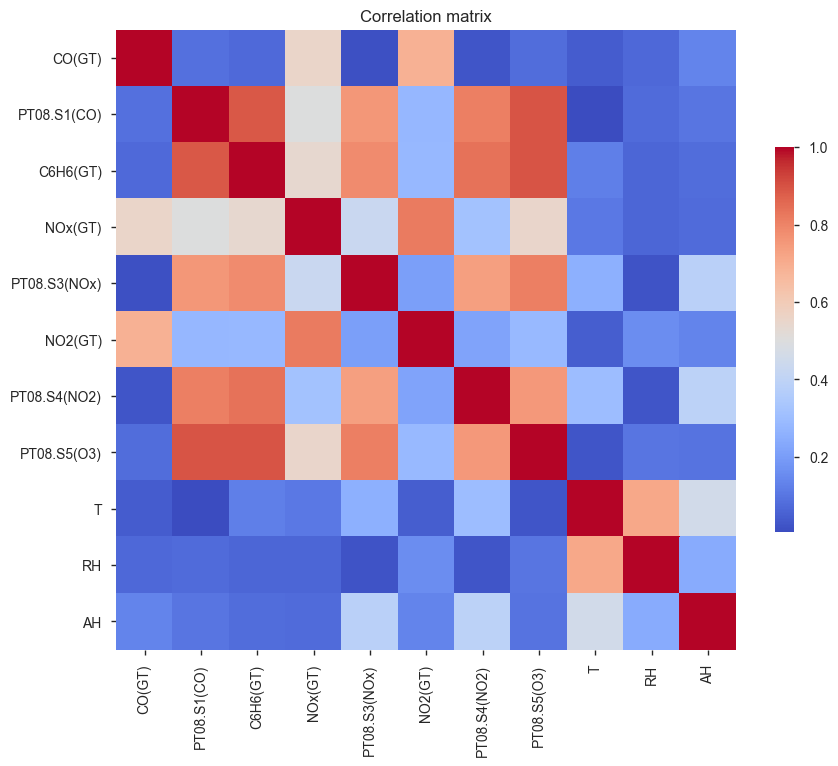

In [11]:
plt.figure(figsize=(10, 10))
corr = np.abs(new_df.corr())
ax = sns.heatmap(corr,  square=True, cbar_kws={"shrink": .5}, cmap="coolwarm")  #center=0,
plt.title("Correlation matrix")

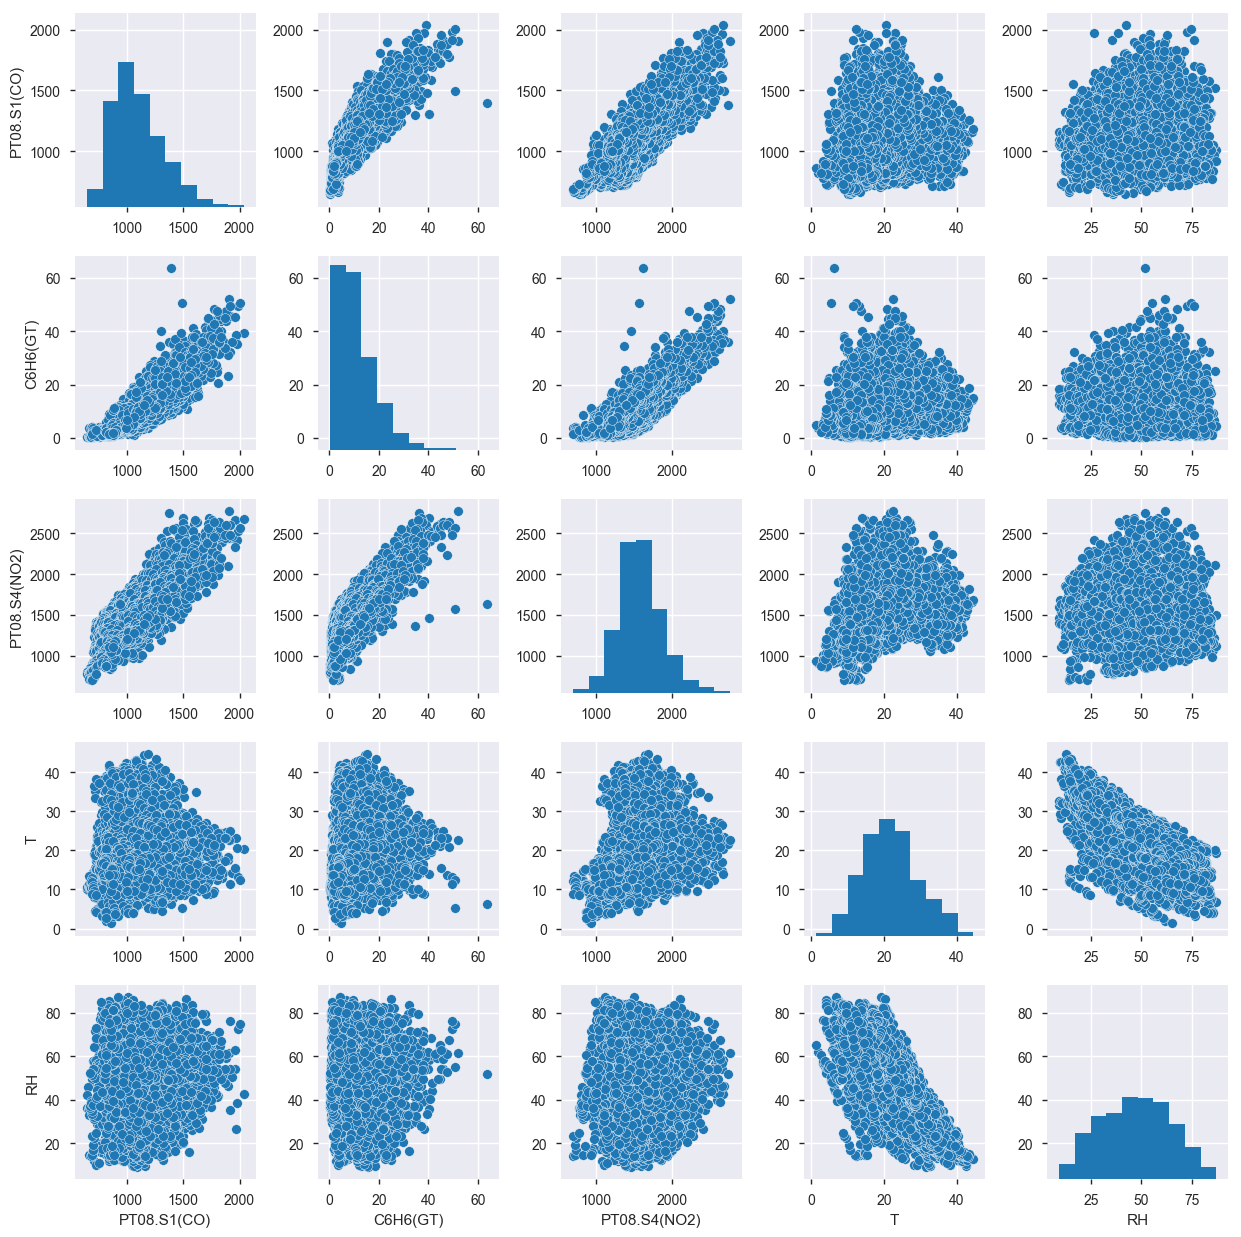

In [12]:
sns_plot = sns.pairplot(new_df[["PT08.S1(CO)", "C6H6(GT)", "PT08.S4(NO2)", "T", "RH"]])

In [13]:
clean_df = new_df.replace(to_replace=-200, value=np.nan)
clean_df.dropna(inplace=True)

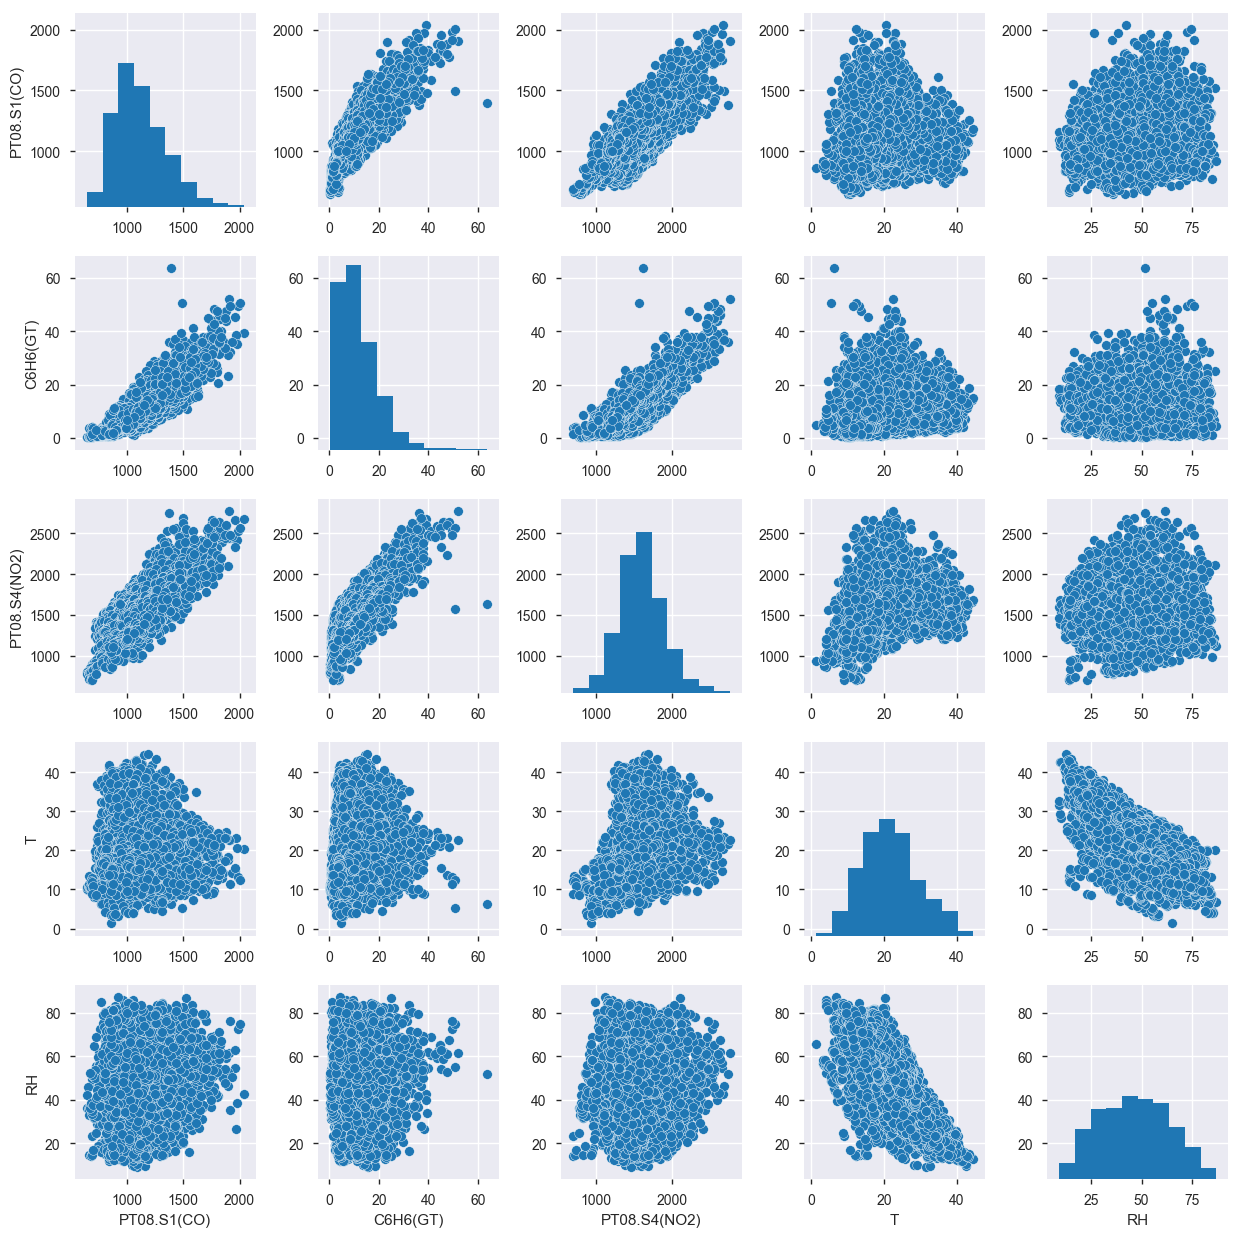

In [14]:
sns_plot = sns.pairplot(clean_df[["PT08.S1(CO)", "C6H6(GT)", "PT08.S4(NO2)", "T", "RH"]])

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4454 entries, 0 to 6217
Data columns (total 12 columns):
Datetime        4454 non-null object
CO(GT)          4454 non-null float64
PT08.S1(CO)     4454 non-null float64
C6H6(GT)        4454 non-null float64
NOx(GT)         4454 non-null float64
PT08.S3(NOx)    4454 non-null float64
NO2(GT)         4454 non-null float64
PT08.S4(NO2)    4454 non-null float64
PT08.S5(O3)     4454 non-null float64
T               4454 non-null float64
RH              4454 non-null float64
AH              4454 non-null float64
dtypes: float64(11), object(1)
memory usage: 612.4+ KB


In [16]:
# clean_df["date_str"] = clean_df["Date"].apply(lambda x: str(x)[:10]+" ")
# clean_df["time_str"] = clean_df["Time"].apply(lambda x: str(x))

In [17]:
# clean_df["datetime_str"] = clean_df["date_str"] + clean_df["time_str"]
# clean_df["datetime_str"] = pd.to_datetime(clean_df["datetime_str"])

In [18]:
from datetime import datetime

In [19]:
clean_df_to_index = clean_df[clean_df["Date"] < datetime(year=2004, month=12, day=1)]
train_df = clean_df_to_index.reset_index().set_index(clean_df_to_index["datetime_str"]).drop(["index", "Date", "Time", "date_str", "time_str", "C6H6(GT)", "datetime_str"], axis=1)

KeyError: 'Date'

In [ ]:
train_df.info()

In [ ]:
clean_df_to_index_test = clean_df[clean_df["Date"] >= datetime(year=2004, month=12, day=1)]
test_df = clean_df_to_index_test.reset_index().set_index(clean_df_to_index_test["datetime_str"]).drop(["index", "Date", "Time", "date_str", "C6H6(GT)", "time_str", "datetime_str"], axis=1)

In [ ]:
scaler = StandardScaler()

In [ ]:
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

In [ ]:
target = clean_df_to_index["C6H6(GT)"]
log_target = np.log(target)
df_index = clean_df_to_index.shape[0]
clean_df_to_index.shape

In [ ]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 
           'neg_median_absolute_error', 'r2']

In [ ]:
linreg = LinearRegression()

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(linreg, train_scaled, target, cv=5, scoring=metric))
print(linreg)

In [ ]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

In [ ]:
linreg = LinearRegression()

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(linreg, train_scaled, log_target, cv=5,  scoring=metric))
print(linreg)

In [ ]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

In [ ]:
linreg = Lasso(random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(linreg, train_df.as_matrix(), log_target, cv=5, scoring=metric))
print(linreg)

In [ ]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

In [ ]:
def neg_rmse_cv(model):
    rmse=cross_val_score(model, train_scaled, log_target, scoring="neg_mean_squared_error", cv=5)
    return(rmse)

In [ ]:
alphas = [ 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5 ]
cv_lasso = [neg_rmse_cv(Lasso(alpha=alpha, random_state=random_state)).mean() for alpha in alphas]

In [ ]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Alpha tuning Lasso.")
plt.xlabel("alpha")
plt.ylabel("neg_mse")

In [ ]:
reg = Lasso( alpha=0.0001, random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(reg, train_scaled, log_target, cv=5, scoring=metric))
print(reg)

In [ ]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

In [ ]:
reg = Ridge(random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(reg, train_scaled, log_target, cv=5, scoring=metric))
print(reg)

In [ ]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

In [ ]:
alphas = [0.05, 0.1, 0.3, 1, 5, 10, 15, 30, 50, 75, 80, 85, 90, 95, 100]
cv_ridge = [neg_rmse_cv(Ridge(alpha=alpha, random_state=random_state)).mean() for alpha in alphas]

In [ ]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Alpha tuning Ridge.")
plt.xlabel("alpha")
plt.ylabel("neg_mse")

In [ ]:
reg = Ridge(alpha=0.5, random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(reg, train_scaled, log_target, cv=5, scoring=metric))
print(reg)

In [ ]:
for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

In [ ]:
parameters = {'alpha':[ 0.00001, 0.00005, 0.0001, 0.0005],
              'l1_ratio':[    0.1, 0.5, 1, 5, 10, 20, 50, 100]}

In [ ]:
regr = ElasticNet(random_state=random_state)
clf = GridSearchCV(estimator=regr, param_grid=parameters, n_jobs=-1, cv=5, scoring="neg_mean_squared_error", verbose=1)

In [ ]:
clf.fit(train_df.as_matrix(), log_target)

In [ ]:
clf.best_score_ 

In [ ]:
clf.best_params_

In [ ]:
regr = ElasticNet(**clf.best_params_, random_state=random_state)

cvs = []
for metric in scoring:
    cvs.append(cross_val_score(regr, train_df.as_matrix(), log_target, cv=5, scoring=metric))
print(regr)

for i in range(len(scoring)):
    print("%s %0.5f" % (scoring[i], cvs[i].mean()))

In [38]:
def print_metrics(y_true, y_pred):
    print("*"*100)
    print("\nRegression metrics:\n")
    print("Mean absolute error {}".format(round(mean_absolute_error(y_true, y_pred), 4)))
    print("Mean squared error {}".format(round(mean_squared_error(y_true, y_pred), 4)))
    print("Median absolute error {}".format(round(median_absolute_error(y_true, y_pred), 4)))
    print("Explained variance score {}".format(round(explained_variance_score(y_true, y_pred), 4)))
    print("R2 score {} \n".format(round(r2_score(y_true, y_pred), 4)))
    print("*"*100)

In [ ]:
y_pred = regr.fit(train_df.as_matrix(), target).predict(np.array(test_df.as_matrix()))

In [ ]:
y_true = np.array(clean_df_to_index_test["C6H6(GT)"])

In [ ]:
print_metrics(y_true, y_pred)

In [ ]:
y_true

In [ ]:
y_pred

In [20]:
kaggle_test = pd.read_csv("test.csv")

In [21]:
kaggle_test

,Unnamed: 0,index,Datetime,CO(GT),PT08.S1(CO),NMHC(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,6218,6218,2004-12-01 00:00:00,2.2,1039.250000,-200,273.0,1197.750000,113.0,1251.000000,933.000000,9.800000,79.400002,0.962598
1,6219,6219,2004-12-01 01:00:00,1.3,885.500000,-200,157.0,1900.000000,94.0,1106.000000,765.500000,10.125000,75.275000,0.932230
2,6220,6220,2004-12-01 02:00:00,1.2,900.250000,-200,117.0,1955.250000,76.0,1126.750000,748.750000,9.150000,80.049999,0.929878
3,6221,6221,2004-12-01 03:00:00,0.9,855.500000,-200,-200.0,2042.250000,-200.0,1100.250000,708.500000,8.700000,82.424999,0.929447
4,6222,6222,2004-12-01 04:00:00,-200.0,856.500000,-200,123.0,2061.000000,68.0,1082.500000,746.000000,8.475000,81.675001,0.907381
5,6223,6223,2004-12-01 05:00:00,0.6,843.750000,-200,100.0,2095.250000,63.0,1063.500000,756.500000,8.350000,80.424999,0.886126
6,6224,6224,2004-12-01 06:00:00,0.9,926.500000,-200,135.0,2009.250000,74.0,1097.750000,791.750000,8.925000,79.225000,0.906740
7,6225,6225,2004-12-01 07:00:00,1.4,1006.500000,-200,301.0,1698.750000,96.0,1248.250000,921.000000,8.675000,80.800001,0.909618
8,6226,6226,2004-12-01 08:00:00,3.4,1317.750000,-200,641.0,1260.750000,121.0,1637.500000,1318.250000,9.050000,79.750000,0.920307
9,6227,6227,2004-12-01 09:00:00,5.0,1396.250000,-200,849.0,1104.250000,145.0,1799.250000,1546.750000,9.550000,78.299997,0.933809


In [22]:
# test_df.as_matrix().shape

In [23]:
test = kaggle_test[["PT08.S1(CO)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]]

In [24]:
# train_df

In [25]:
test

,PT08.S1(CO),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1039.250000,1197.750000,1251.000000,933.000000,9.800000,79.400002,0.962598
1,885.500000,1900.000000,1106.000000,765.500000,10.125000,75.275000,0.932230
2,900.250000,1955.250000,1126.750000,748.750000,9.150000,80.049999,0.929878
3,855.500000,2042.250000,1100.250000,708.500000,8.700000,82.424999,0.929447
4,856.500000,2061.000000,1082.500000,746.000000,8.475000,81.675001,0.907381
5,843.750000,2095.250000,1063.500000,756.500000,8.350000,80.424999,0.886126
6,926.500000,2009.250000,1097.750000,791.750000,8.925000,79.225000,0.906740
7,1006.500000,1698.750000,1248.250000,921.000000,8.675000,80.800001,0.909618
8,1317.750000,1260.750000,1637.500000,1318.250000,9.050000,79.750000,0.920307
9,1396.250000,1104.250000,1799.250000,1546.750000,9.550000,78.299997,0.933809


In [26]:
clean_df_to_index = clean_df
train_df = clean_df_to_index.reset_index().drop(["index", "Datetime", "C6H6(GT)", "NOx(GT)", "NO2(GT)", "CO(GT)"], axis=1)
target = clean_df_to_index["C6H6(GT)"]
log_target = np.log(target)
new_scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
train_scaled = poly.fit_transform(train_df)
test_scaled = poly.fit_transform(kaggle_test[["PT08.S1(CO)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]])
# train_scaled = new_scaler.fit_transform(train_scaled)
# test_scaled = new_scaler.transform(test_scaled)

In [27]:
parameters = {'alpha':[ 0.00000001,0.00001, 0.00005, 0.0001, 0.0005],
              'l1_ratio':[    0.1, 0.5, 1, 5, 10, 20, 50, 100, 120]}
regr = ElasticNet(random_state=random_state)
clf = GridSearchCV(estimator=regr, param_grid=parameters, n_jobs=-1, cv=5, scoring="neg_mean_squared_error", verbose=1)
clf.fit(train_df.as_matrix(), target)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=17, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [1e-08, 1e-05, 5e-05, 0.0001, 0.0005], 'l1_ratio': [0.1, 0.5, 1, 5, 10, 20, 50, 100, 120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [33]:
linreg = LinearRegression()
regr = ElasticNet(**clf.best_params_, random_state=random_state)
fitted = linreg.fit(train_scaled, target)
y_pred = fitted.predict(np.array(test_scaled))
# y_pred = np.exp(y_pred)

In [34]:
save_df = pd.DataFrame(y_pred, columns=["target"])
save_df.to_csv("answer.csv", index=False)

In [35]:
y_true_df = pd.read_csv("y_test.csv")

In [36]:
y_true = np.array(y_true_df["target"])

In [37]:
np.sqrt(mean_squared_error(y_pred, y_true))

2.854532106579823

In [41]:
print_metrics(y_true, y_pred)

****************************************************************************************************

Regression metrics:

Mean absolute error 2.1812
Mean squared error 8.1484
Median absolute error 1.7926
Explained variance score 0.8903
R2 score 0.8241 

****************************************************************************************************
